In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Nhập dữ liệu

In [41]:
df=pd.read_csv("D:\py\medical_insurance.csv")

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\2406788183.py:1: SyntaxWarning: invalid escape sequence '\p'
  df=pd.read_csv("D:\py\medical_insurance.csv")


# Phân tích khám phá dữ liệu (EDA)

## Kiểm tra dữ liệu

- Xem qua dữ liệu

In [42]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


- Xem thông tin tổng quan

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


- Mô tả thống kê

In [44]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


- Tần suất xuất hiện của các giá trị trong cột phân loại

In [45]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Tần suất xuất hiện của các giá trị trong cột {col}:")
    print(df[col].value_counts())
    print("\n")


Tần suất xuất hiện của các giá trị trong cột sex:
sex
male      1406
female    1366
Name: count, dtype: int64


Tần suất xuất hiện của các giá trị trong cột smoker:
smoker
no     2208
yes     564
Name: count, dtype: int64


Tần suất xuất hiện của các giá trị trong cột region:
region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64




## Làm sạch dữ liệu

- Dữ liệu thiếu

In [46]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Dữ liệu bị trùng lặp

In [47]:
#Kiểm tra giá trị trùng lặp
df.duplicated().sum()

#Xử lý giá trị trùng lặp
df=df.drop_duplicates()

- Kiểm tra giá trị ngoại lệ

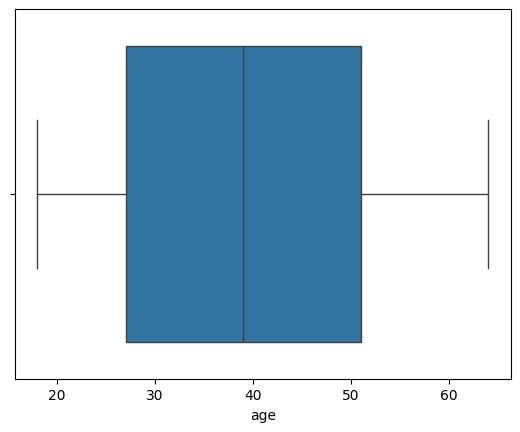

In [48]:
#boxplot của age
sns.boxplot(x=df['age'])
plt.show()

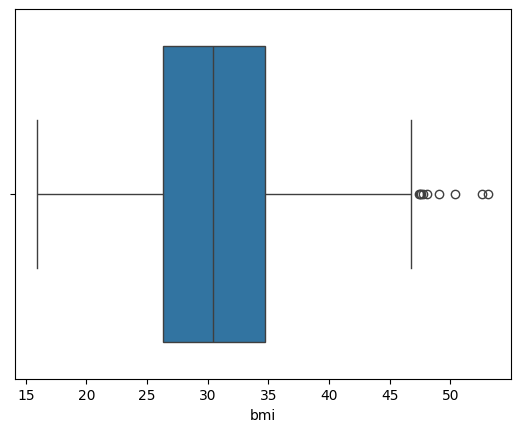

In [49]:
#boxplot của bmi
sns.boxplot(x=df['bmi'])
plt.show()

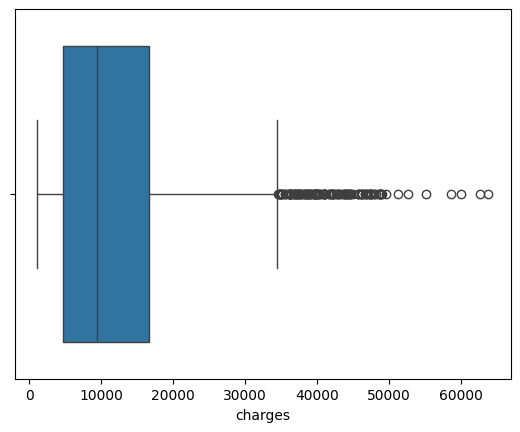

In [50]:
#boxplot của charges
sns.boxplot(x=df['charges'])
plt.show()

## Mô tả các biến

### Đối với biến phân loại

- Sex

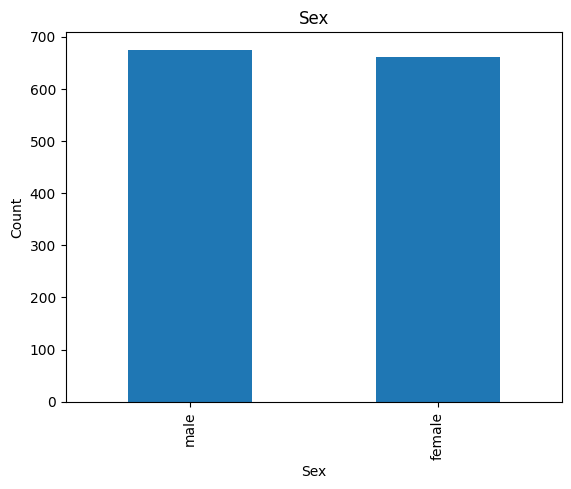

In [51]:
# Vẽ biểu đồ thanh cho cột 'sex'
df['sex'].value_counts().plot(kind='bar')

# Đặt tiêu đề cho biểu đồ
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()

- Smoker

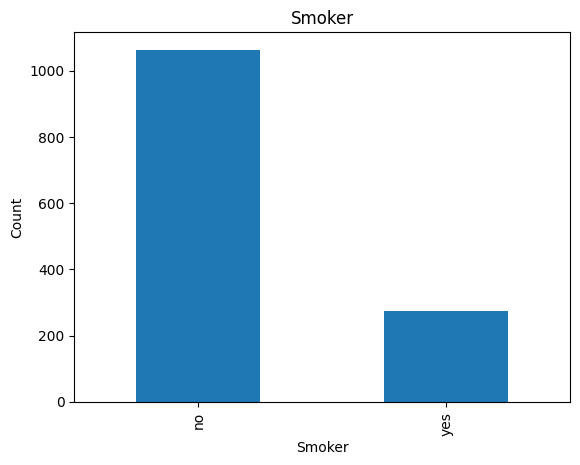

In [52]:
df['smoker'].value_counts().plot(kind='bar')

plt.title('Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

plt.show()

- Region

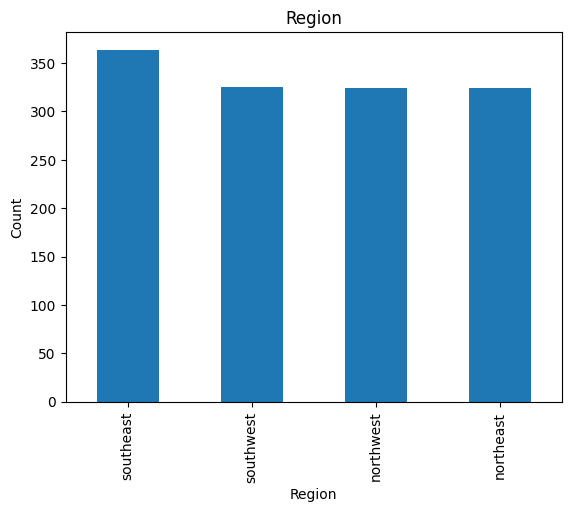

In [53]:
df['region'].value_counts().plot(kind='bar')

plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()

### Đối với biến số

- age

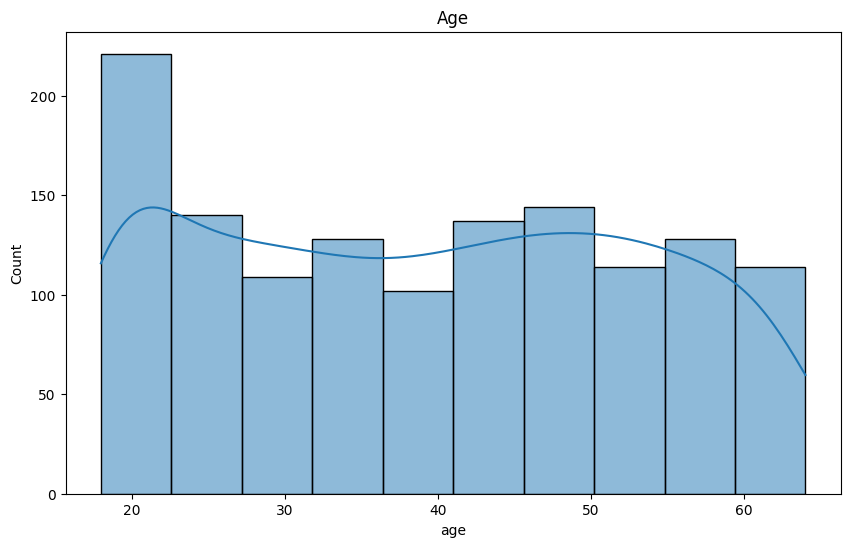

In [54]:
# Vẽ biểu đồ phân phối cho cột 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age')
plt.show()

- BMI

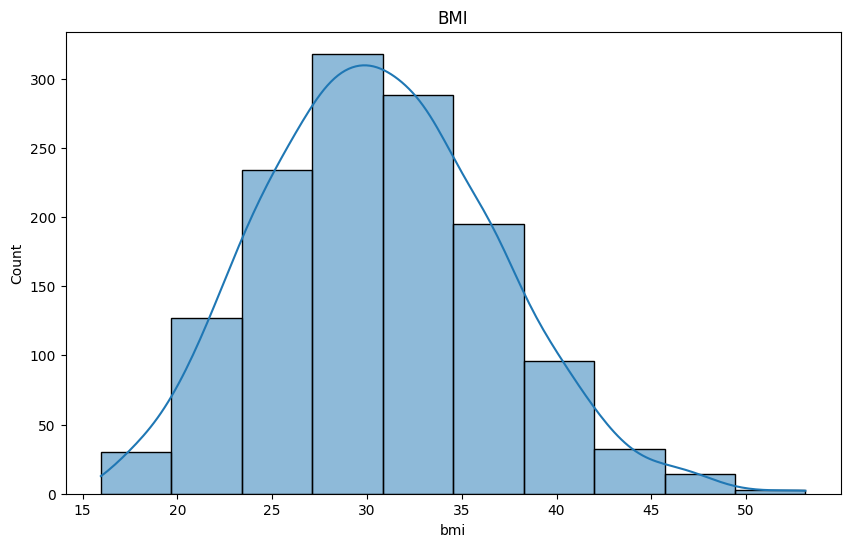

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=10, kde=True)
plt.title('BMI')
plt.show()

- Children

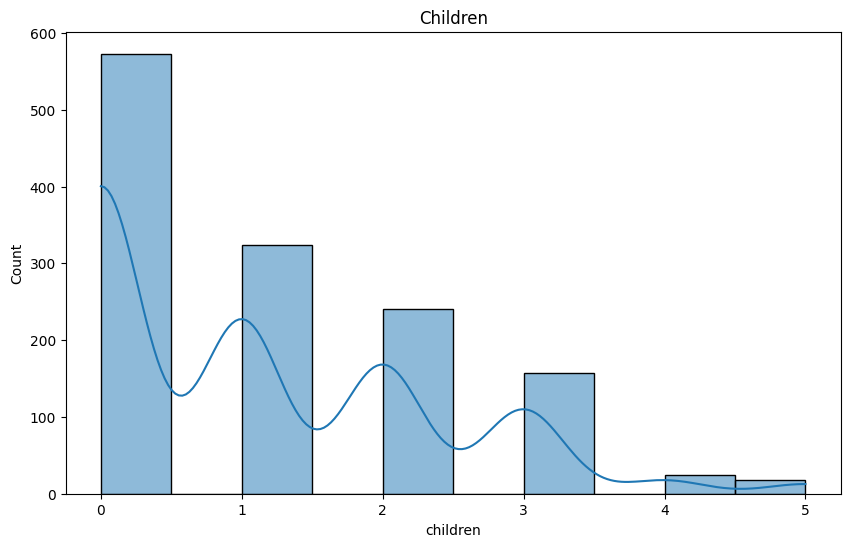

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['children'], bins=10, kde=True)
plt.title('Children')
plt.show()

- Charge

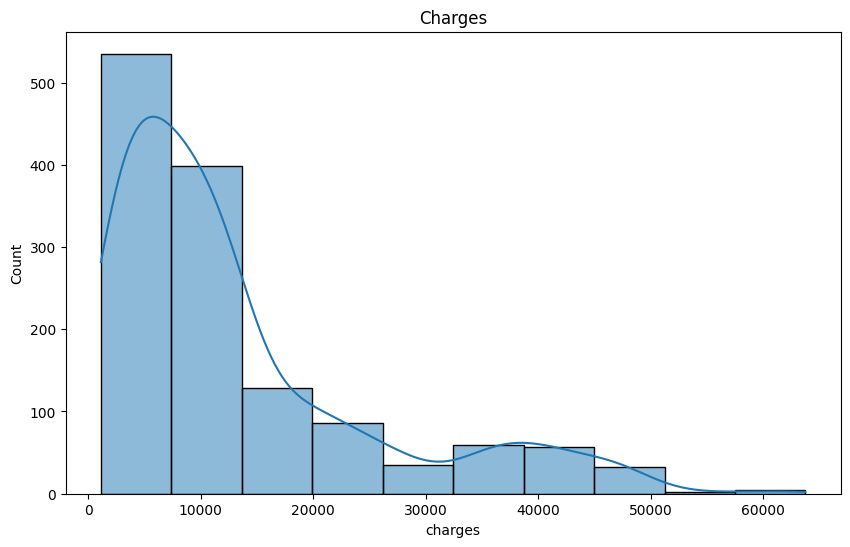

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=10, kde=True)
plt.title('Charges')
plt.show()

## Tương quan giữa các biến với chi phí bảo hiểm

### Sex & Charge

C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\377166714.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex',y='charges',data=df,palette='Blues',hue='sex', ci=None)


<Axes: title={'center': 'Sex vs Charge'}, xlabel='sex', ylabel='charges'>

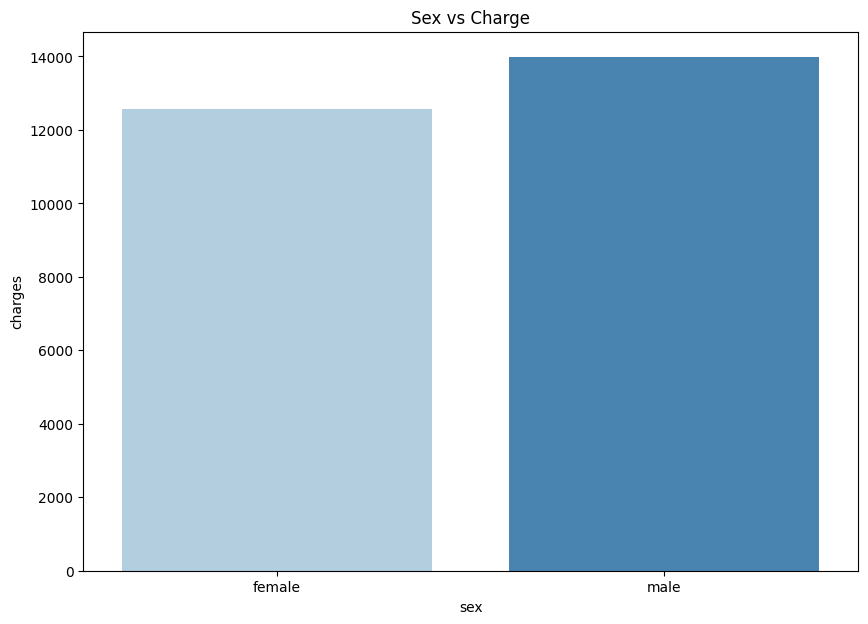

In [58]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charge')
sns.barplot(x='sex',y='charges',data=df,palette='Blues',hue='sex', ci=None)

### Smoker & Charge

C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\3299958739.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='smoker',y='charges',data=df,palette='Blues',ci=None)
C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\3299958739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker',y='charges',data=df,palette='Blues',ci=None)


<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

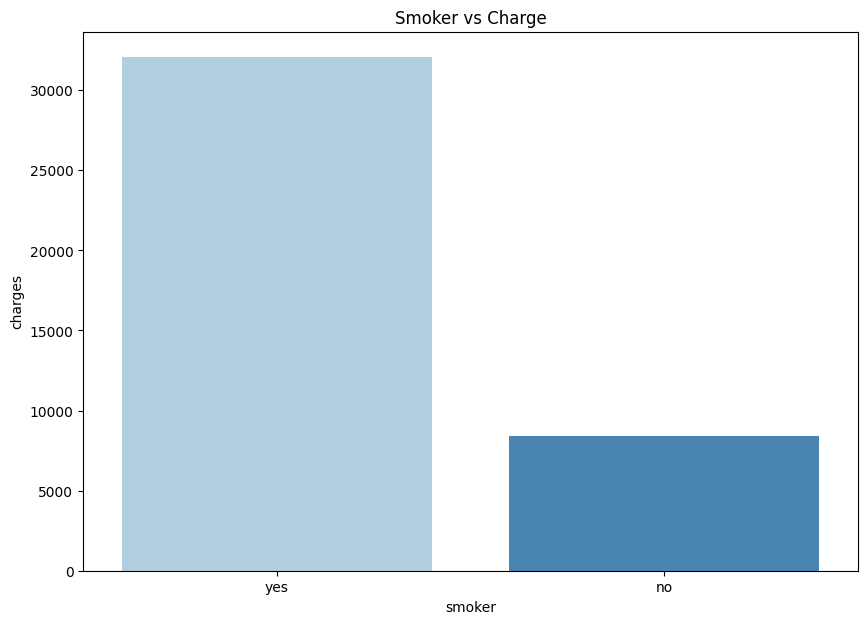

In [59]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',ci=None)

### Region & Charge

C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\2297688029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region',y='charges',data=df,palette='husl', ci=None)
C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\2297688029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=df,palette='husl', ci=None)


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

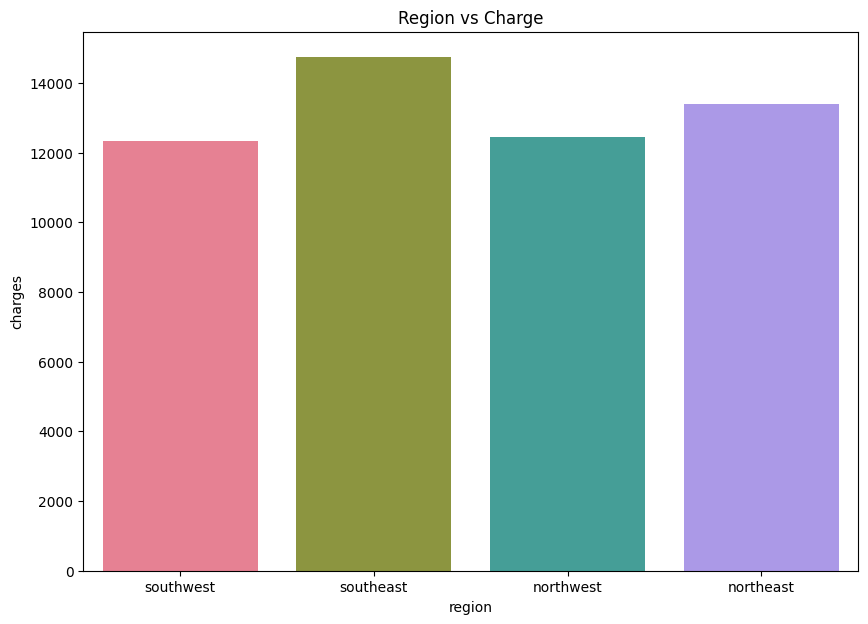

In [60]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df,palette='husl', ci=None)

### Age & Charge

C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\209669819.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age',y='charges',data=df,palette='husl', ci=None)
C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\209669819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=df,palette='husl', ci=None)


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

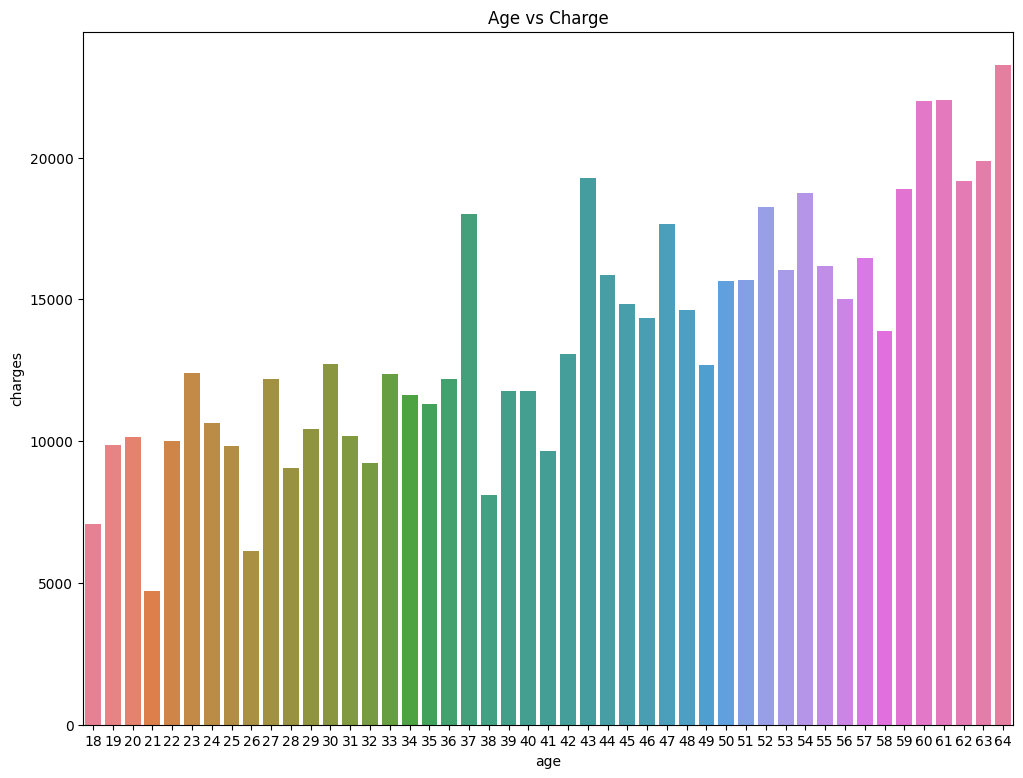

In [61]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl', ci=None)

### Children & Charge

C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\991742058.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='children',y='charges',data=df, ci=None)


<Axes: title={'center': 'Children vs Charge'}, xlabel='children', ylabel='charges'>

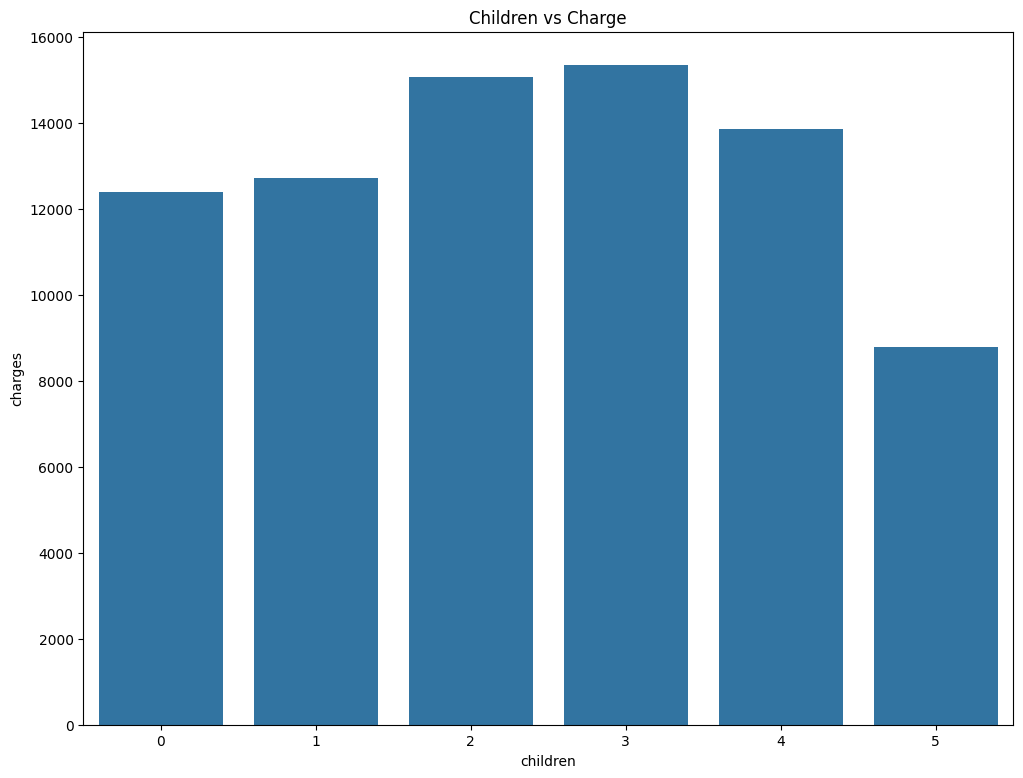

In [62]:
plt.figure(figsize=(12,9))
plt.title('Children vs Charge')
sns.barplot(x='children',y='charges',data=df, ci=None)

### BIM & Charges

Text(0.5, 1.0, 'BMI VS Charge')

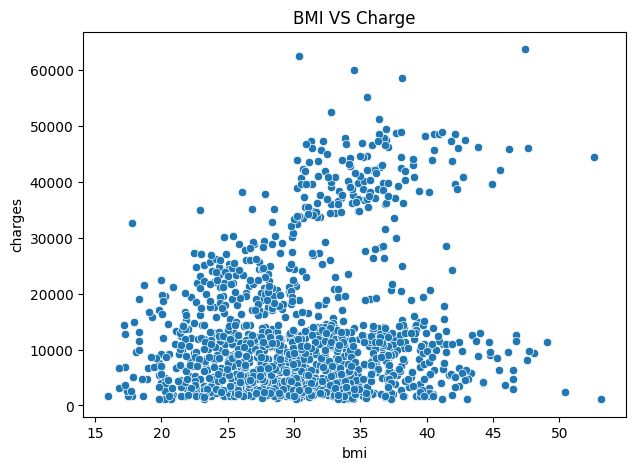

In [63]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.title('BMI VS Charge')

# Xủ lý dữ liệu lệch, mã hóa

## Xủ lý dữ liệu lệch

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

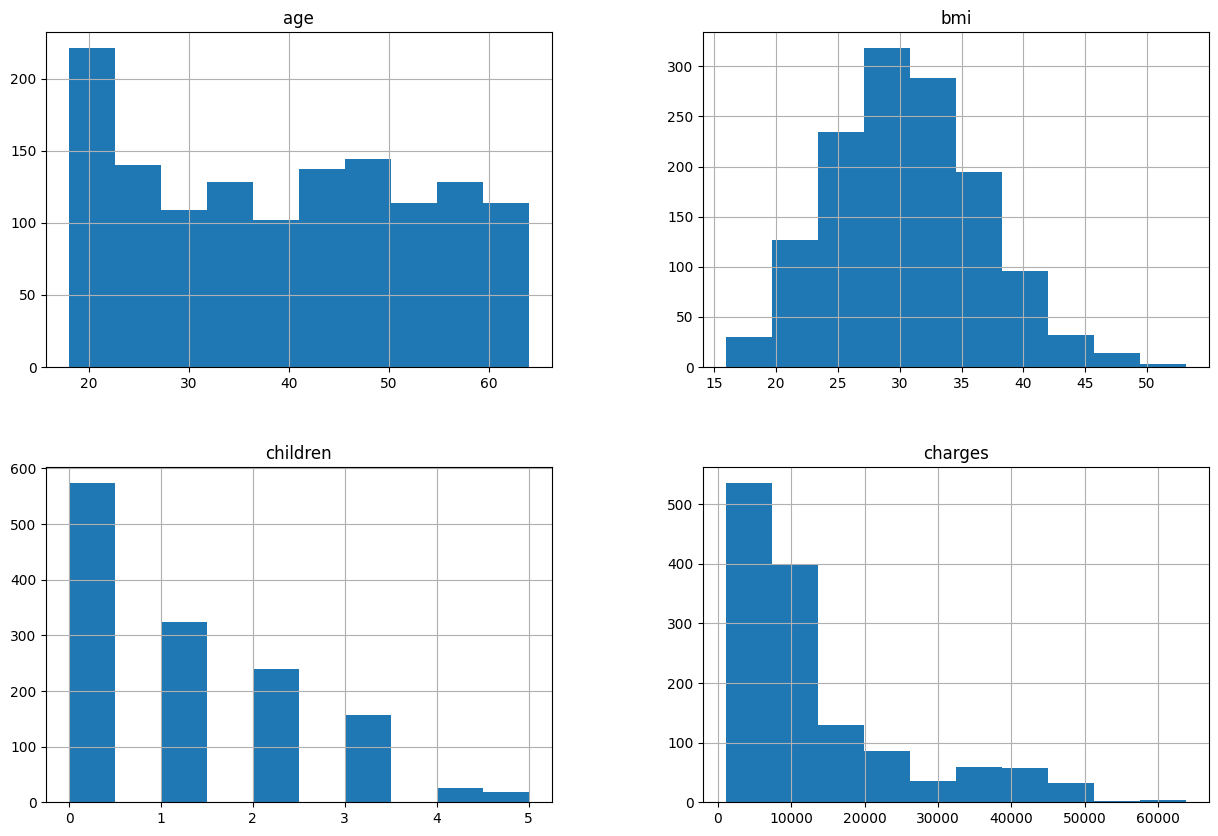

In [64]:
#phân bố dữ liệu
df.hist(figsize=(15,10))

In [65]:
from scipy.stats import skew
print("Chỉ số skewness của cột 'age':",skew(df['age']))
print("Chỉ số skewness của cột 'bmi':",skew(df['bmi']))
print("Chỉ số skewness của cột 'charges':",skew(df['charges']))

Chỉ số skewness của cột 'age': 0.054719294607049676
Chỉ số skewness của cột 'bmi': 0.2835955670169306
Chỉ số skewness của cột 'charges': 1.5136902413349014


In [66]:
"""
age=0.055 > 0 => lệch phải
bmi=0.28 > 0 => lệch phải
charges=1.51 > 1 => rất lệch phải

 Log Transformation
Mô tả: Log transformation là việc chuyển đổi các giá trị của một biến bằng cách lấy logarit tự nhiên (hoặc logarit với cơ số khác). Ví dụ, giá trị mới sẽ là 
log(x+1) (cộng 1 để tránh log(0)).
Áp dụng: Phương pháp này thường được sử dụng cho dữ liệu lệch phải (positive skew) để giảm độ lệch, làm cho phân phối gần với phân phối chuẩn hơn.
Tình huống: Nếu dữ liệu có các giá trị lớn, log transformation có thể giúp giảm sự ảnh hưởng của những giá trị ngoại lai (outliers).
"""

'\nage=0.055 > 0 => lệch phải\nbmi=0.28 > 0 => lệch phải\ncharges=1.51 > 1 => rất lệch phải\n\n Log Transformation\nMô tả: Log transformation là việc chuyển đổi các giá trị của một biến bằng cách lấy logarit tự nhiên (hoặc logarit với cơ số khác). Ví dụ, giá trị mới sẽ là \nlog(x+1) (cộng 1 để tránh log(0)).\nÁp dụng: Phương pháp này thường được sử dụng cho dữ liệu lệch phải (positive skew) để giảm độ lệch, làm cho phân phối gần với phân phối chuẩn hơn.\nTình huống: Nếu dữ liệu có các giá trị lớn, log transformation có thể giúp giảm sự ảnh hưởng của những giá trị ngoại lai (outliers).\n'

In [67]:
#Xử lý dữ liệu bị lệch phải
df['charges']=np.log(df['charges']+1) 
df['bmi']=np.log(df['bmi']+1) 

C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\3564868849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charges']=np.log(df['charges']+1)
C:\Users\ACER\AppData\Local\Temp\ipykernel_23964\3564868849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi']=np.log(df['bmi']+1)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

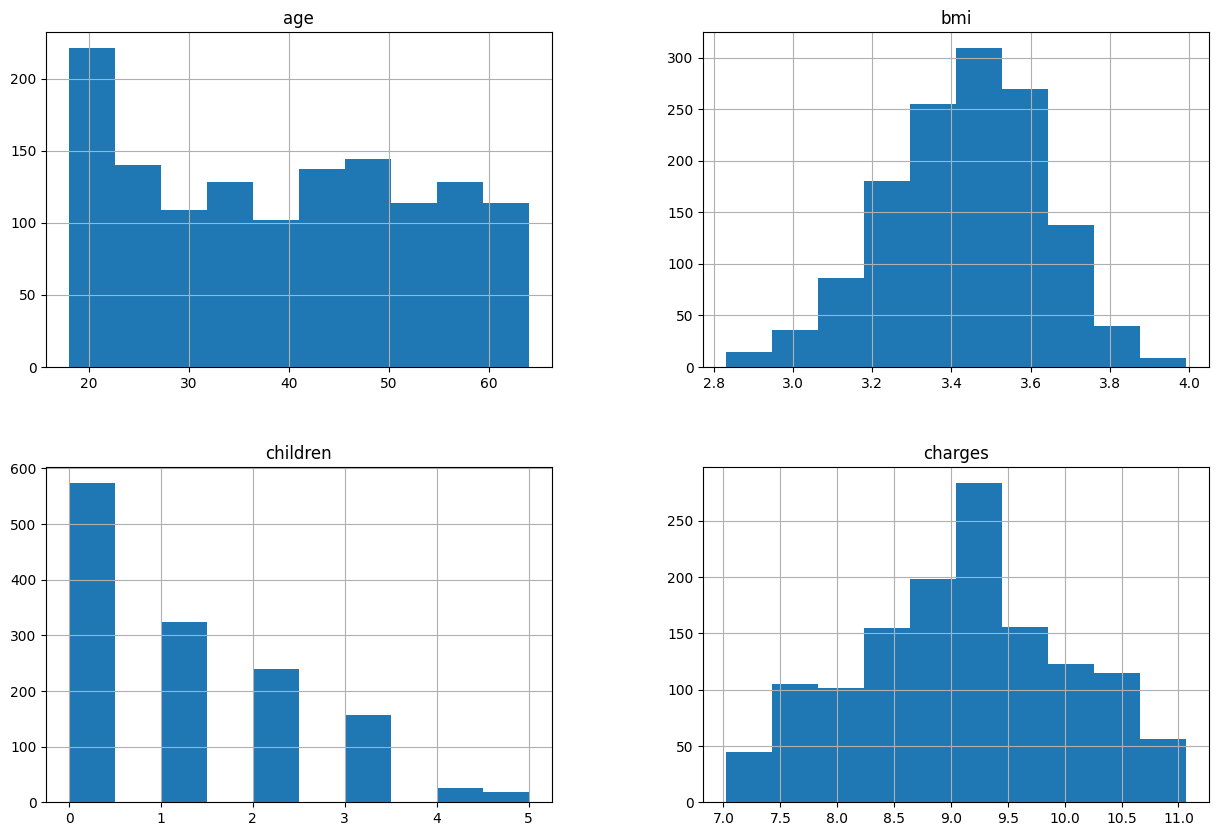

In [68]:
#phân bố dữ liệu
df.hist(figsize=(15,10))

## Mã hóa biến phân loại

In [69]:
# Sử dụng one-hot encoding cho cột 'region' 
df_encoded = pd.get_dummies(df['region'])

# Nối kết quả vào DataFrame ban đầu
df = df.join(df_encoded)

# Xóa cột ban đầu nếu không cần
df.drop(columns='region', inplace=True)

#Chuyển đổi cột giới tính, smoker
df.sex= df.sex.map({'male':0, 'female':1})
df.smoker= df.smoker.map({'no':0, 'yes':1})

# Huấn luyện mô hình

In [70]:
#Cài đặt các thư viện cần thiết
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Chia tập dữ liệu

In [71]:
# Xác định các biến đầu vào và biến mục tiêu
X=df.drop(columns='charges')
y=df['charges']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


## Linear Regression

In [72]:
#Chuẩn hóa dữ liệu
scaler=StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=42)

In [73]:
#Huấn luyện mô hình
lin_reg = LinearRegression()
lin_reg.fit(X_train_s, y_train)

LinearRegression()

In [74]:
# Đánh giá mô hình bằng phương pháp Cross-validation
"""Chức năng này cross_validatekhác với cross_val_score"""

from sklearn.model_selection import cross_validate 
result = cross_validate(lin_reg, X_scaler,y,cv=5,return_train_score=True, scoring='r2' ) 
print("Linear Regression Train scores:", result['train_score'])
print("Linear Regression mean train scores:", result['train_score'].mean())

print("Linear Regression Test scores:", result['test_score'])
print("Linear Regression mean Test scores:", result['test_score'].mean())

Linear Regression Train scores: [0.75968863 0.78763535 0.7526358  0.76782786 0.77542819]
Linear Regression mean train scores: 0.7686431647488192
Linear Regression Test scores: [0.79797463 0.68869931 0.83070831 0.76851994 0.73556107]
Linear Regression mean Test scores: 0.7642926519876241


## Random Forest Regressor

In [75]:
#Huấn luyện mô hình
rf= RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [76]:
#Đánh giá mô hình bằng Cross...
from sklearn.model_selection import cross_validate 
result = cross_validate(rf, X_scaler,y,cv=5,return_train_score=True, scoring='r2' )

print("Random Forest mean train scores:", result['train_score'].mean())
print("Random Forest mean Test scores:", result['test_score'].mean())

Random Forest mean train scores: 0.9715660044764951
Random Forest mean Test scores: 0.811171305257252


- Chỉ số R2 test của mô hình Random... là tốt hơn
- Tuy nhiên, chỉ số R2 của tập train là rất lớn -> có hiện tượng overfitting
- => Điều chỉnh các tham số của mô hình RandomForest bằng RandomSearch

### Điều chỉnh các tham số của mô hình RandomForest bằng RandomSearch

In [77]:
from sklearn.model_selection import RandomizedSearchCV
params={
    'n_estimators': [100,200,300], #số cây trong mô hình
    'max_depth':[None,5,10], #Độ sâu tối đa của cây
    'min_samples_split':[2,5,10], # Số mẫu ...
    'min_samples_leaf': [1,2,4], #
    'bootstrap': [True, False] #phương thức chọn mẫu 
}

## điều chỉnh bằng cách sử dụng random search (mất ít thời gian hơn gridSearchCV);
# random search: chọn tất cả tham số, Grid...: kiểm tra mỗi tham số nên tốn thời gian hơn
random_search= RandomizedSearchCV(
    param_distributions=params,
    estimator=RandomForestRegressor(),
    cv=5,
    return_train_score=True,
    scoring='r2',
    n_jobs=-1
)


In [78]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [79]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'bootstrap': True}

In [80]:
random_search.cv_results_['mean_train_score'].mean()

np.float64(0.8936830736632766)

In [81]:
random_search.cv_results_['mean_test_score'].mean()

np.float64(0.802906809001132)

## Tạo mô hình với bộ tham số tốt hơn

In [87]:
rf2=RandomForestRegressor(n_estimators= 200,
                          min_samples_split=10,
                          min_samples_leaf= 4,
                          max_depth= 5,
                          bootstrap= True)

In [88]:
rf2.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

In [89]:
y_pred_train_rf2=rf2.predict(X_train)
train_score_rf2=r2_score(y_train, y_pred_train_rf2)

y_pred_test_rf2=rf2.predict(X_test)
test_score_rf2=r2_score(y_test, y_pred_test_rf2)

In [90]:
print(train_score_rf2)
print(test_score_rf2)


0.8492248035723893
0.8826916600746145


#### Đánh giá mô hình

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


# Tính các chỉ số
mae = mean_absolute_error(y_test, y_pred_test_rf2)
mse = mean_squared_error(y_test, y_pred_test_rf2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_rf2)
evs = explained_variance_score(y_test, y_pred_test_rf2)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test_rf2)) / np.array(y_test))) * 100

# Kết quả
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Explained Variance Score:", evs)
print("MAPE:", mape)

MAE: 0.17601614792001372
MSE: 0.10884899127172033
RMSE: 0.3299227049957616
R²: 0.8826916600746145
Explained Variance Score: 0.882828240430714
MAPE: 1.9591266310870297


In [96]:
# Dữ liệu đầu vào (age, sex, bmi, children, smoker, region_1, region_2, region_3, region_4)
bmi=np.log(34.1 + 1)
input_data = (37, 1, bmi, 4, 1, 0, 0, 0, 1)

# Chuyển dữ liệu đầu vào thành numpy array
input_data_array = np.asarray(input_data)

# Định hình lại dữ liệu (vì mô hình yêu cầu dữ liệu 2D cho dự đoán)
input_data_array = input_data_array.reshape(1, -1)

# Áp dụng StandardScaler để chuẩn hóa dữ liệu (nếu bạn đã chuẩn hóa dữ liệu trong quá trình huấn luyện)
#input_data_scaled = scaler.transform(input_data_array)

# Dự đoán chi phí y tế
insurance_premium_log = rf2.predict(input_data_array)

# Đảo ngược biến đổi logarit để đưa kết quả về giá trị ban đầu
insurance_premium = np.exp(insurance_premium_log) - 1

print(f"Dự đoán chi phí y tế: {insurance_premium[0]:.2f}")


Dự đoán chi phí y tế: 40036.16


C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
